In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pandas_datareader import data,wb
from datetime import date as date
import datetime as dt

In [3]:
import yfinance as yf
yf.pdr_override()

In [4]:
start = dt.datetime(2000,1,1)
end = dt.datetime(2023,12,31)
today = date.today()

In [5]:
def generate_tickers_and_weights(*args):
    tickers = []
    weights = []
    for arg in args:
        ticker, weight = arg
        tickers.append(ticker)
        weights.append(weight)
    return tickers, weights

# Add Tickers and Corresponding Weights
tickers, weights = generate_tickers_and_weights(('NVDA', 0.2), ('AAPL', 0.2), ('MSFT', 0.2), ('BAC', 0.2), ('TGT', 0.2))
print("Tickers:", tickers)
print("Weights:", weights)

Tickers: ['NVDA', 'AAPL', 'MSFT', 'BAC', 'TGT']
Weights: [0.2, 0.2, 0.2, 0.2, 0.2]


In [6]:
sec_data = pd.DataFrame()

for t in tickers:
    sec_data [t] = data.get_data_yahoo(t, start)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
sec_returns = np.log(sec_data / sec_data.shift(1))

In [8]:
sec_data.tail(3)

,NVDA,AAPL,MSFT,BAC,TGT
Date,,,,,
2024-03-26,925.609985,169.710007,421.649994,37.090000,172.639999
2024-03-27,902.500000,173.309998,421.429993,37.810001,174.669998
2024-03-28,903.559998,171.479996,420.720001,37.919998,177.210007


In [9]:
for r in tickers:
    print ('Annual Rate of Returns: ', [r], round(sec_returns[r].mean() *250,4)*100, '%')

Annual Rate of Returns:  ['NVDA'] 28.37 %
Annual Rate of Returns:  ['AAPL'] 21.78 %
Annual Rate of Returns:  ['MSFT'] 10.07 %
Annual Rate of Returns:  ['BAC'] 4.41 %
Annual Rate of Returns:  ['TGT'] 8.43 %


In [10]:
for v in tickers:
    print ('Variance of Returns: ', [v], round(sec_returns[v].var(),6)*100, '%')

Variance of Returns:  ['NVDA'] 0.1399 %
Variance of Returns:  ['AAPL'] 0.0651 %
Variance of Returns:  ['MSFT'] 0.0368 %
Variance of Returns:  ['BAC'] 0.0774 %
Variance of Returns:  ['TGT'] 0.0429 %


In [11]:
for d in tickers:
    print ('Annualized Volatility: ', [d], round(sec_returns[d].std()*250**(0.5),2)*100, '%')

Annualized Volatility:  ['NVDA'] 59.0 %
Annualized Volatility:  ['AAPL'] 40.0 %
Annualized Volatility:  ['MSFT'] 30.0 %
Annualized Volatility:  ['BAC'] 44.0 %
Annualized Volatility:  ['TGT'] 33.0 %


In [12]:
cov_matrix = sec_returns.cov()*250
cov_matrix

,NVDA,AAPL,MSFT,BAC,TGT
NVDA,0.349856,0.098737,0.086937,0.072042,0.051364
AAPL,0.098737,0.162767,0.057047,0.054213,0.036626
MSFT,0.086937,0.057047,0.092091,0.049659,0.034657
BAC,0.072042,0.054213,0.049659,0.193422,0.053137
TGT,0.051364,0.036626,0.034657,0.053137,0.107244


In [13]:
corr_matrix = sec_returns.corr()
corr_matrix

,NVDA,AAPL,MSFT,BAC,TGT
NVDA,1.000000,0.413763,0.484339,0.276943,0.265175
AAPL,0.413763,1.000000,0.465947,0.305537,0.277221
MSFT,0.484339,0.465947,1.000000,0.372083,0.348736
BAC,0.276943,0.305537,0.372083,1.000000,0.368944
TGT,0.265175,0.277221,0.348736,0.368944,1.000000


<Axes: >

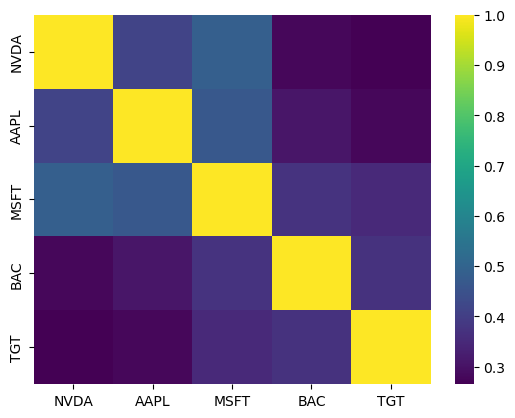

In [14]:
sns.heatmap(corr_matrix, cmap = 'viridis')

<Axes: xlabel='Date'>

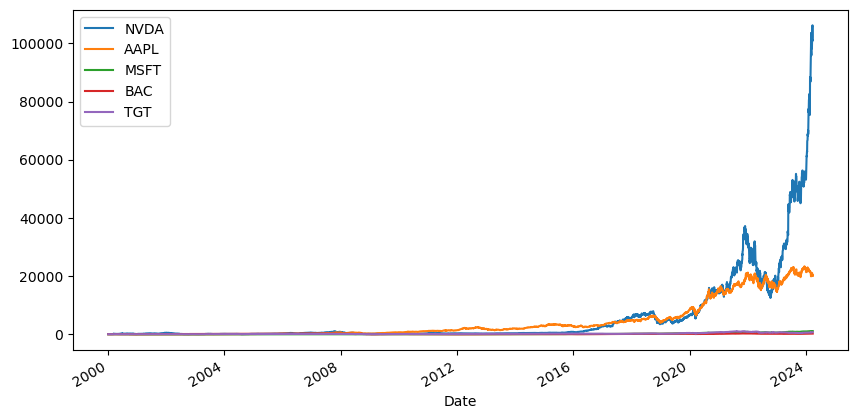

In [15]:
(sec_data/sec_data.iloc[0]*100).plot(figsize=(10,5))

In [16]:
pfolio_var = np.dot(weights, np.dot(sec_returns.cov() * 250, weights))
print ('Portfolio Variance (total risk): ', round(pfolio_var*100,2), '%')

Portfolio Variance (total risk):  8.38 %


In [17]:
pfolio_volt = (np.dot(weights, np.dot(sec_returns.cov() * 250, weights)))**0.5
print ('Portfolio Volatility(standard deviation/uncertainty): ', round(pfolio_volt*100,2), '%')

Portfolio Volatility(standard deviation/uncertainty):  28.94 %


In [18]:
sec_var_annual = pd.DataFrame()
for x in tickers:
    sec_var_annual = sec_returns.var()*250

sec_var_annual

NVDA    0.349856
AAPL    0.162767
MSFT    0.092091
BAC     0.193422
TGT     0.107244
dtype: float64

In [27]:
# Annuzlized Portfolio Return (Weighted Avg.)

pfolio_return_annual = np.dot((sec_returns.mean()*250),weights)
print ('Annual Portfolio Return:', str(round(pfolio_return_annual,3)*100), '%')

Annual Portfolio Return: 14.6 %


In [19]:
# Diversifiable Risk

d_risk = pfolio_var
for weight, sec_var in zip(weights, sec_var_annual):
    d_risk -= weight ** 2 * sec_var

print ('Diversifiable Risk: ', str(round(d_risk * 100,3)), '%')

Diversifiable Risk:  4.755 %


In [20]:
# Non-Diversifiable Risk

n_d_risk = pfolio_var - d_risk

print ('Non-Diversifiable Risk: ', str(round(n_d_risk * 100, 3)), '%')

Non-Diversifiable Risk:  3.622 %
